<a href="https://colab.research.google.com/github/shinoasada1907/flask_api/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trước khi bắt đầu

Hãy đảm bảo rằng sổ tay có thể truy cập vào CPU. Có thể sử dụng lệnh `nvidia-smi` để làm điều đó. Trong trường hợp có bất kỳ sự cố nào, hãy chọn `Edit` -> `Notebook settings` -> `Hardware accelerator`, chọn `GPU` và sau đó click `Save`.

In [ ]:
!nvidia-smi

Tue Mar 28 06:05:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Cài đặt YOLOv8
YOLOv8 có thể được cài đặt theo hai cách - từ nguồn và qua pip. Điều này là do đây là phiên bản đầu tiên của YOLO có gói chính thức. Ở đây sẽ cài đặt qua pip.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Tải dữ liệu
Tôi đã chuẩn bị sẵn dữ liệu gồm 9448 ảnh vết nứt bê tông đã được gắn nhãn và chia thành 3 tập train, valid và test. Việc của ta là sẽ tải về tập dữ liệu đó và nhớ nhập vào key api của từ Roboflow trước khi chạy.

---


https://universe.roboflow.com/kj-zy1ya/crack-btlnb

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="PUjIJMRDFiJvh9xcqstw") #Sửa lại api key của bạn trong " "
project = rf.workspace("kj-zy1ya").project("crack-btlnb")
dataset = project.version(4).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 4.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-4 in yolov8:: 100%|██████████| 18908/18908 [00:05<00:00, 3522.60it/s]


## Huấn luyện mô hình
Ở đây bạn cần chọn phiên bản mô hình Yolov8 cần huấn luyện, Yolov8 có 5 phiên bản: YOLOv8n, YOLOv8s, YOLOv8n, YOLOv8l, YOLOv8x được sắp xếp theo thứ tự tăng dần về hiệu suất nhưng cũng đòi hỏi về thời gian train lâu dần. Chọn số lần epochs cần chạy và size ảnh để huấn luyện.


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=400

/content
100% 88.1M/88.1M [00:04<00:00, 22.0MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/crack-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

Xem kết quả mà mô hình dự đoán


/content


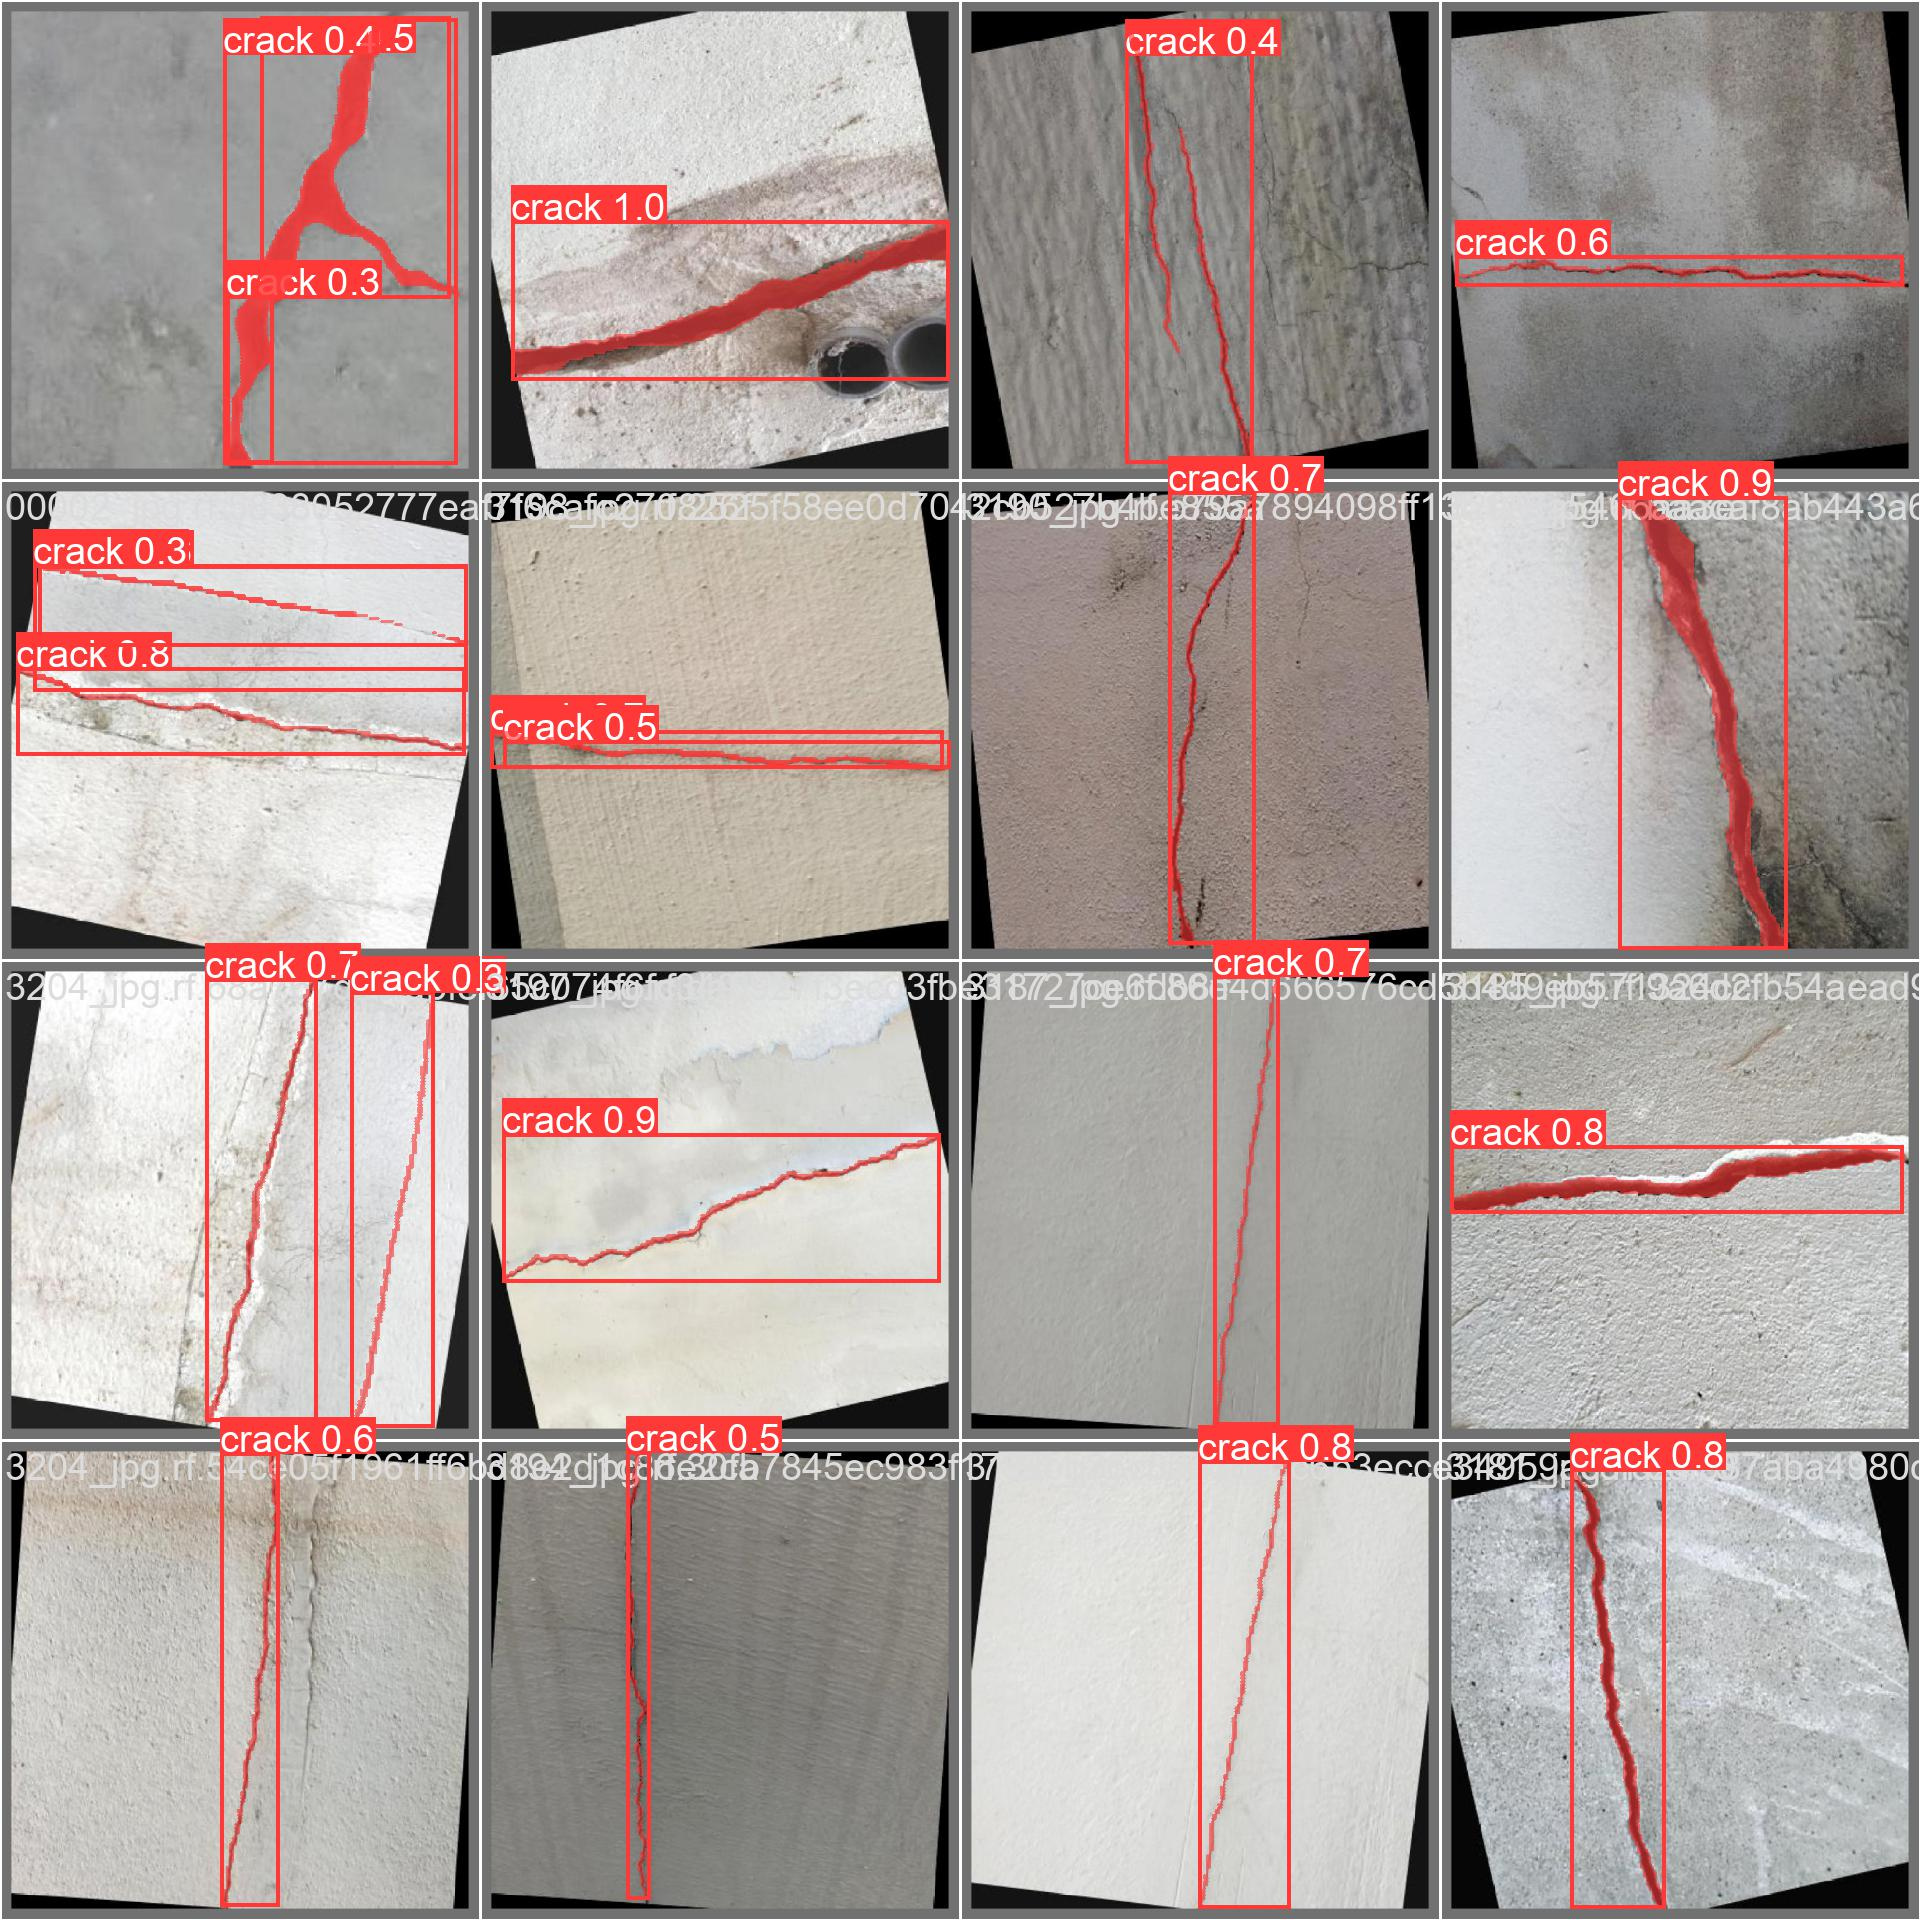

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

Xem dự đoán với tập Test và những dữ liệu khác


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.1 source={dataset.location}/test/new save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/25 /content/datasets/crack-4/test/new/be tong 2 (1).jpg: 640x640 78.1ms
image 2/25 /content/datasets/crack-4/test/new/be tong 2 (10).jpg: 640x640 3 cracks, 47.7ms
image 3/25 /content/datasets/crack-4/test/new/be tong 2 (11).jpg: 640x640 5 cracks, 44.3ms
image 4/25 /content/datasets/crack-4/test/new/be tong 2 (12).jpg: 640x640 8 cracks, 43.9ms
image 5/25 /content/datasets/crack-4/test/new/be tong 2 (13).jpg: 640x640 7 cracks, 40.2ms
image 6/25 /content/datasets/crack-4/test/new/be tong 2 (14).jpg: 640x640 2 cracks, 39.1ms
image 7/25 /content/datasets/crack-4/test/new/be tong 2 (15).jpg: 640x640 1 crack, 41.0ms
image 8/25 /content/datasets/crack-4/test/new/be tong 2 (16).jpg: 640x640 1 crack, 40.3ms
image 9/25 /content/datasets/crack-4/test/new/be tong 2 (17).jpg: 640x640 7 cracks, 40.6ms
image 10/

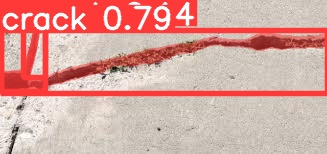

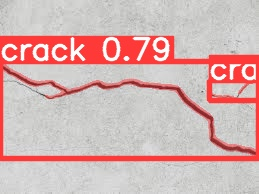

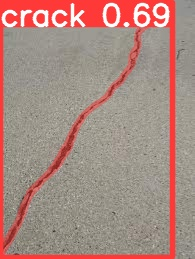

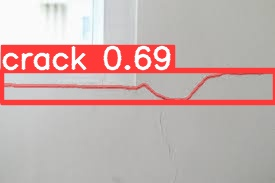

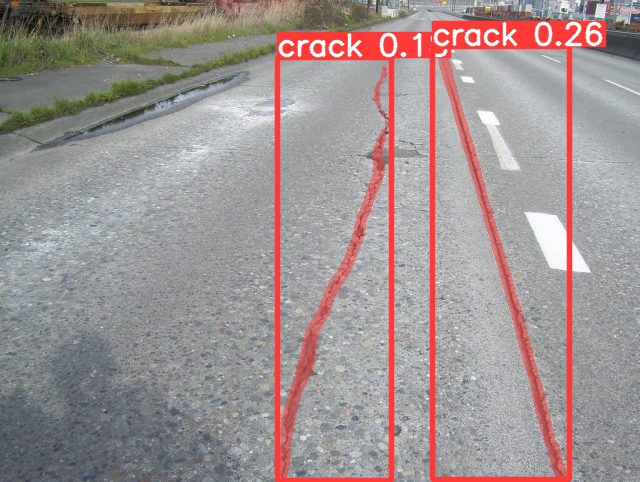

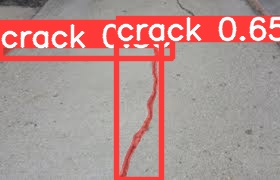

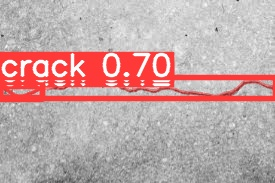

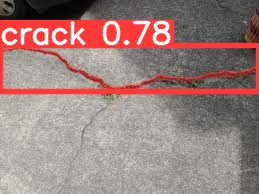

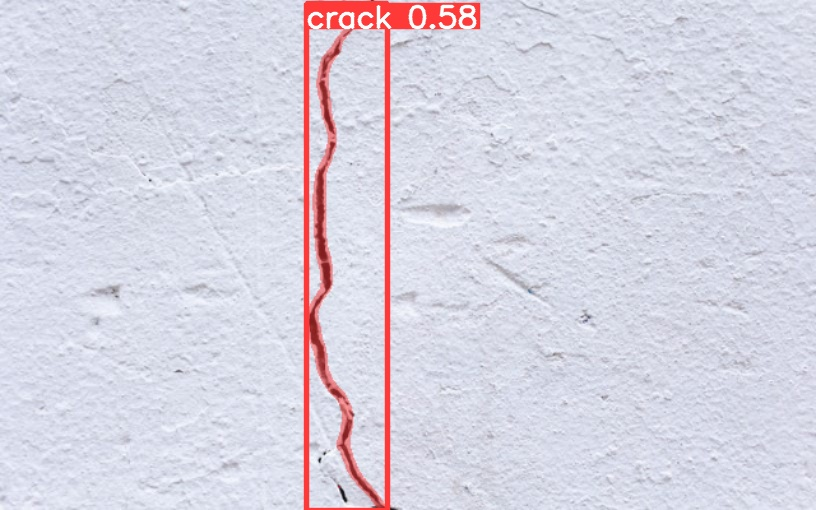

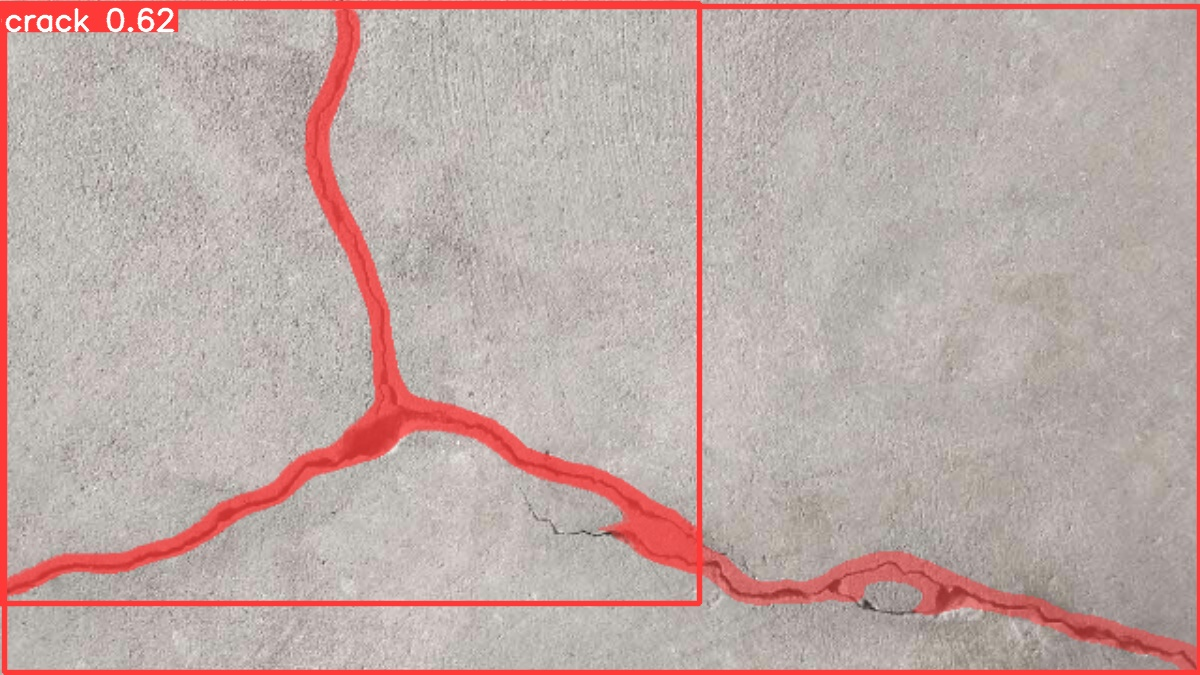

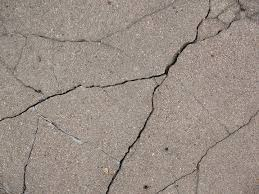

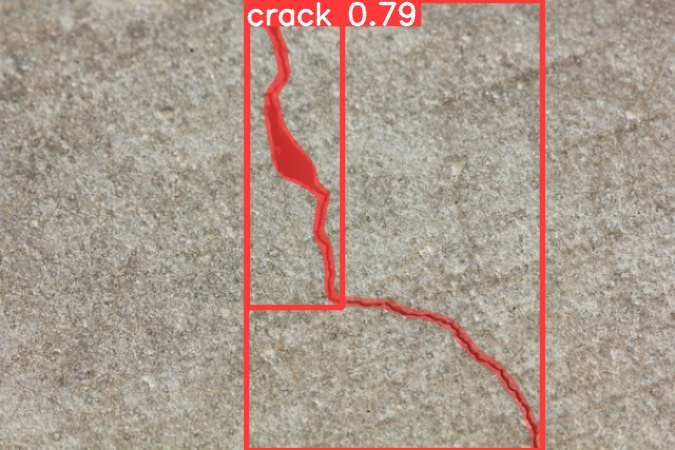

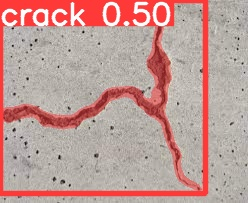

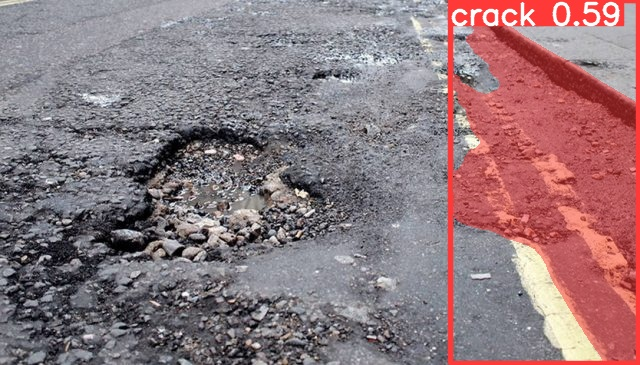

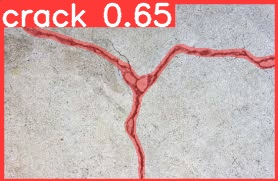

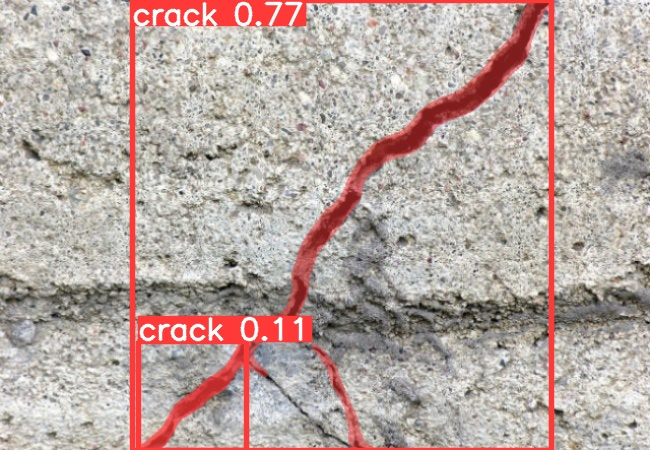

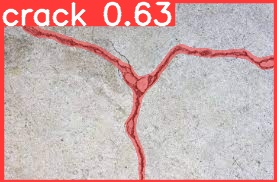

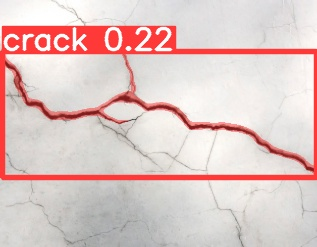

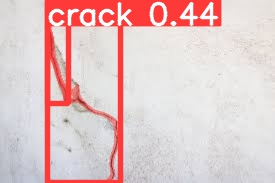

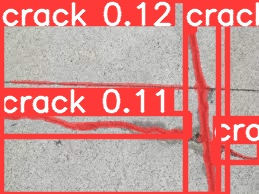

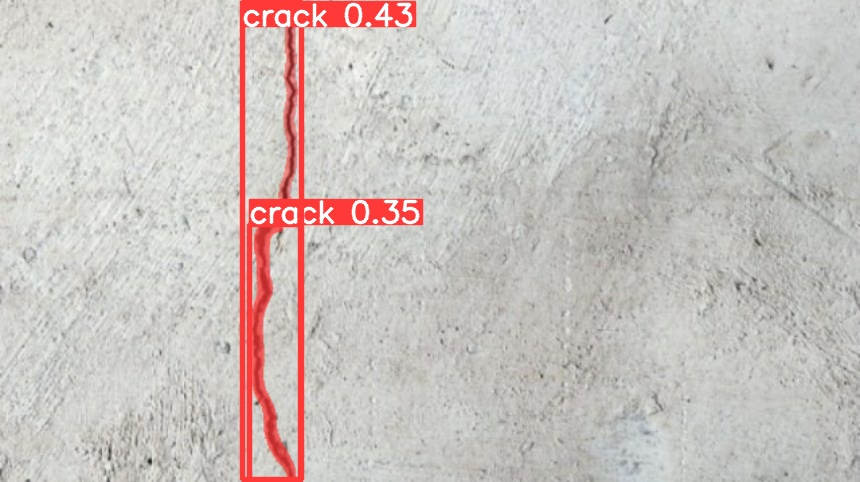

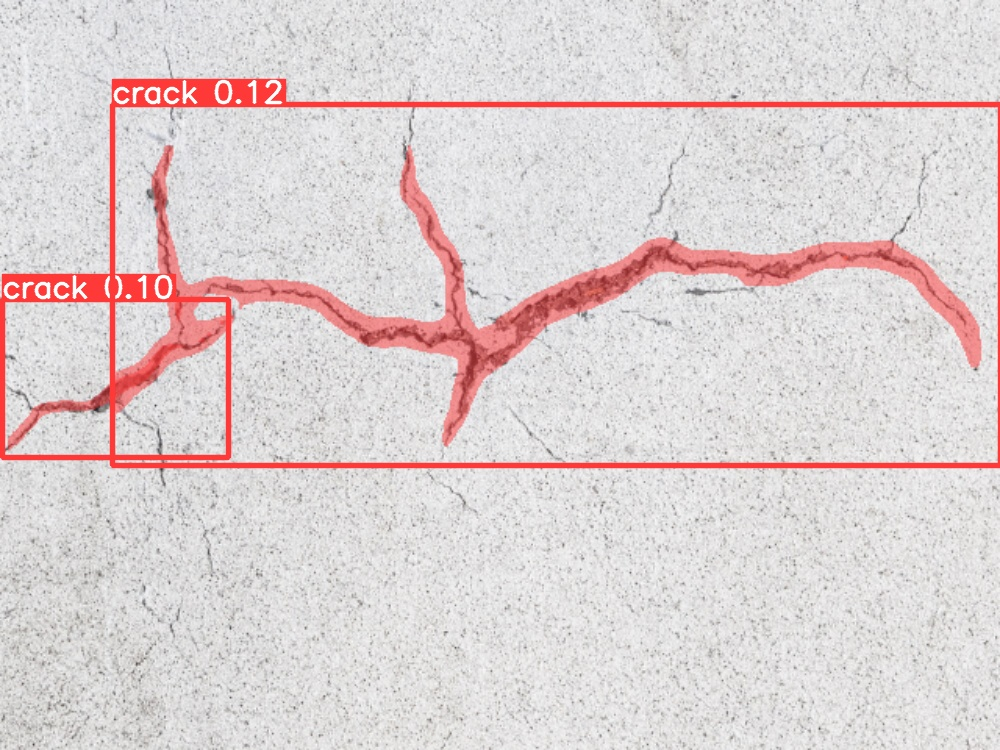

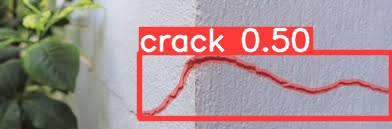

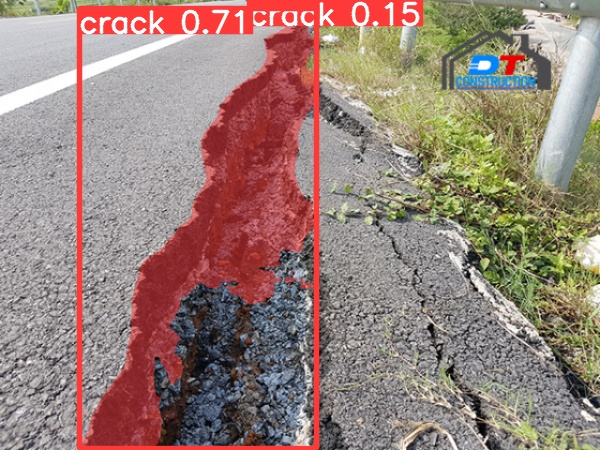

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:200]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Tạo mẫu để sử dụng mô hình
Trước tiên, hãy tải file trọng số .pt của mô hình về và upload lên Drive của bạn. Trên Drive, chuẩn bị sẵn các thư mục chứa các hình ảnh cần sử dụng để dự đoán với mô hình. Sau đó tiến hành kết nối sổ tay với Drive của bạn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/drive/MyDrive/concrete/new/be tong 2 (4).jpg: 640x640 1 crack, 67.0ms
Speed: 0.7ms pre-process, 67.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


Có vết nứt trên hình
Diện tích của đối tượng trên mask là: 12323 đơn vị
Diện tích của ảnh gốc là: 409600 đơn vị
Mức độ nứt:  3.01 %


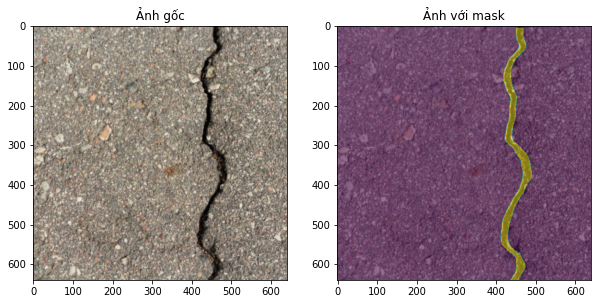

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
imagePath = '/content/drive/MyDrive/concrete/new/be tong 2 (4).jpg'

# Load mô hình YOLO đã được train
model = YOLO(f'/content/drive/MyDrive/concrete/best.pt')

# Dự đoán và tính toán diện tích đối tượng trên mask và ảnh gốc
results = model.predict(source=imagePath, conf=0.25)
if not results[0]:
    print('Không có vết nứt trên hình')
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    image = plt.imread(imagePath)
    ax[0].imshow(image)
    ax[1].imshow(image)

    ax[0].set_title('Ảnh gốc')
    ax[1].set_title('Ảnh với mask')
else:
    print('Có vết nứt trên hình')
    masks = results[0].masks.masks.cpu().numpy()
    total_area = np.sum(masks == 1)
    pixel_size = 1  # Giả sử kích thước của mỗi pixel là 1 đơn vị
    object_area = total_area * pixel_size * pixel_size
    print('Diện tích của đối tượng trên mask là:', object_area, 'đơn vị')

    image = plt.imread(imagePath)
    image_area = image.shape[0] * image.shape[1] * pixel_size * pixel_size
    print('Diện tích của ảnh gốc là:', image_area, 'đơn vị')
    phantram = round(object_area/image_area*100, 2)
    print('Mức độ nứt: ', phantram, '%')
    # Hiển thị hình ảnh và vẽ lại các mask lên hình ảnh
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[1].imshow(image)

    for mask in masks:
        ax[1].imshow(mask, alpha=0.5)

    ax[0].set_title('Ảnh gốc')
    ax[1].set_title('Ảnh với mask')

plt.show()